In [23]:
import pyslm
from pyslm import hatching as hatching

from libSLM.translators import mtt

from pyslm import geometry

In [24]:
solidPart = pyslm.Part('nut')
solidPart.setGeometry('./stl_artifact/Parameter_quality_nut_1.stl')
solidPart.origin = [10.0, 10.0, 5.0]
solidPart.dropToPlatform()

Geometry information <nut> - [./stl_artifact/Parameter_quality_nut_1.stl]
	 bounds [[ 34.29000092 -39.94499969   0.        ]
 [ 46.99000168 -17.4741745   22.22500038]]
	 extent [12.70000076 22.4708252  22.22500038]
Updating Document Object Geometry Representation


In [25]:
# Create a StripeHatcher object for performing any hatching operations
myHatcher = hatching.StripeHatcher()
myHatcher.stripeWidth = 5.0

# Set the base hatching parameters which are generated within Hatcher
myHatcher.hatchAngle = 10 # [°]
myHatcher.volumeOffsetHatch = 0.08 # [mm]
myHatcher.spotCompensation = 0.06 # [mm]
myHatcher.numInnerContours = 2
myHatcher.numOuterContours = 1

In [26]:
model = geometry.Model()
model.mid = 1
model.name = "Nut"

In [27]:
header = geometry.Header()
header.filename = "MTT Layerfile"
header.version = (1, 2)
header.zUnit = 100

In [28]:
BuildStyle = geometry.BuildStyle()
BuildStyle.bid = 1

# Set the laser parameters for the Contour Build Style
BuildStyle.laserPower = 200  # W
BuildStyle.laserSpeed = 500  # mm/s - Note this is used on some systems but should be set
BuildStyle.laserFocus = 0.0  # mm - (Optional) Some new systems can modify the focus position real-time.

BuildStyle.pointDistance = 50  # μm - Distance between exposure points
BuildStyle.pointExposureTime = 80  # ms - Exposure time
BuildStyle.laserId = 3
BuildStyle.laserMode = geometry.LaserMode.Pulse 

In [29]:
model.buildStyles.append(BuildStyle)

In [30]:
import numpy as np

layer_list = []
layerId = 0

for i in np.arange(0.0, solidPart.boundingBox[5], 0.1):
    myHatcher.hatchAngle += 66.7

    geomSlice = solidPart.getVectorSlice(i)
    layer = myHatcher.hatch(geomSlice)

    for geo in layer.geometry:
        geo.mid = model.mid
        geo.bid = BuildStyle.bid

    # The layer height is set in integer increment of microns to ensure no rounding error during manufacturing
    layer.z = int(30*i)
    layer.layerId = layerId
    layer_list.append(layer)

    layerId += 1

model.topLayerId = layerId - 1

Updating Document Object Geometry Representation
bounding box bbox [ 44.67   -25.6447  56.61   -10.4953]
len of lines 968
bounding box bbox [ 44.67   -25.7025  56.61   -10.3953]
len of lines 972
bounding box bbox [ 44.67   -25.7602  56.61   -10.2953]
len of lines 980
bounding box bbox [ 44.67   -25.8179  56.61   -10.1953]
len of lines 984
bounding box bbox [ 44.67   -25.8757  56.61   -10.0953]
len of lines 992
bounding box bbox [ 44.67   -25.9334  56.61    -9.9953]
len of lines 996
bounding box bbox [ 44.67   -25.9911  56.61    -9.8953]
len of lines 1255
bounding box bbox [ 44.67   -26.0489  56.61    -9.7953]
len of lines 1265
bounding box bbox [ 44.67   -26.1066  56.61    -9.6953]
len of lines 1270
bounding box bbox [ 44.67   -26.1644  56.61    -9.5953]
len of lines 1280
bounding box bbox [ 44.67   -26.2221  56.61    -9.4953]
len of lines 1285
bounding box bbox [ 44.67   -26.2798  56.61    -9.3953]
len of lines 1295
bounding box bbox [ 44.67   -26.3376  56.61    -9.2953]
len of lines 

bounding box bbox [ 44.67   -27.0188  56.61    -8.1153]
len of lines 1400
bounding box bbox [ 44.67   -26.9611  56.61    -8.2153]
len of lines 1390
bounding box bbox [ 44.67   -26.9034  56.61    -8.3153]
len of lines 1385
bounding box bbox [ 44.67   -26.8456  56.61    -8.4153]
len of lines 1375
bounding box bbox [ 44.67   -26.7879  56.61    -8.5153]
len of lines 1365
bounding box bbox [ 44.67   -26.7302  56.61    -8.6153]
len of lines 1360
bounding box bbox [ 44.67   -26.6724  56.61    -8.7153]
len of lines 1350
bounding box bbox [ 44.67   -26.6147  56.61    -8.8153]
len of lines 1340
bounding box bbox [ 44.67   -26.557   56.61    -8.9153]
len of lines 1335
bounding box bbox [ 44.67   -26.4992  56.61    -9.0153]
len of lines 1325
bounding box bbox [ 44.67   -26.4415  56.61    -9.1153]
len of lines 1320
bounding box bbox [ 44.67   -26.3838  56.61    -9.2153]
len of lines 1310
bounding box bbox [ 44.67   -26.326   56.61    -9.3153]
len of lines 1300
bounding box bbox [ 44.67   -26.2683  

In [31]:
model.topLayerId

172

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

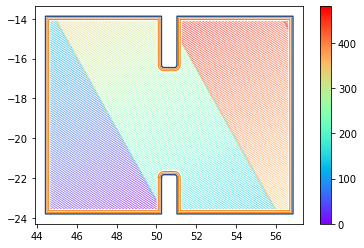

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axis('equal')
pyslm.visualise.plot(layer, plot3D=False, handle=(fig,ax))

In [33]:
export_mtt = mtt.Writer()
export_mtt.setFilePath('./output/nut_new.mtt')
export_mtt.write(header, [model], layer_list)

In [34]:
from pyslm import geometry

In [35]:
from pyslm.geometry.utils import ModelValidator

ModelValidator.validateBuildStyle(BuildStyle)

In [36]:
ModelValidator.validateBuild([model], layer_list)

C:\Users\m384wang\Anaconda3\envs\pyslm\lib\site-packages\pythonslm-0.3.0-py3.8-win-amd64.egg\pyslm\geometry\utils.py:148: UserWarning: Warning: Model(Nut was not used in any layer)
  warn("Warning: Model({:s} was not used in any layer)".format(model.name))


True